In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, LogNorm

In [56]:
experiment = '1'
first = f'{experiment}.1'
second = f'{experiment}.2'
third = f'{experiment}.3'
# name = 'online-agent-percentage'

In [57]:
data1 = pd.read_csv('experiments/baseline-experiment.csv', skiprows=6)
data2 = pd.read_csv(f'experiments/experiment {first}.csv', skiprows=6)
data3 = pd.read_csv(f'experiments/experiment {second}.csv', skiprows=6)
data4 = pd.read_csv(f'experiments/experiment {third}.csv', skiprows=6)

In [58]:
def calculate_entropy(data, run_number, num_intervals=10):
    entropies = []
    run_data = data[data['[run number]'] == run_number]
    for _, row in run_data.iterrows():
        opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
        N = len(opinions)
        interval_counts, _ = np.histogram(opinions, bins=num_intervals, range=(0, 1))
        entropy = -sum((count / N) * np.log(count / N) for count in interval_counts if count > 0)
        entropies.append(entropy)
    return entropies

entropies1 = calculate_entropy(data1, 1)
entropies2 = calculate_entropy(data2, 1)
entropies3 = calculate_entropy(data3, 2)
entropies4 = calculate_entropy(data4, 4)

df = pd.DataFrame({
    'run_index': list(range(len(entropies1))) * 4,
    'entropy': entropies1 + entropies2 + entropies3 + entropies4,
    'run': ['Baseline'] * len(entropies1) + [f'Experiment {first}'] * len(entropies2) + [f'Experiment {second}'] * len(entropies3) + [f'Experiment {third}'] * len(entropies4)
})

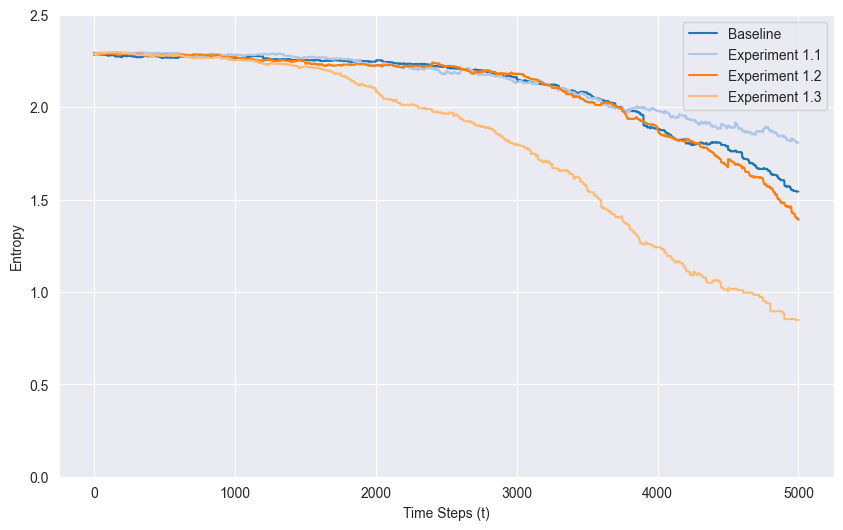

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='run_index', y='entropy', hue='run', palette='tab20', errorbar=None)
plt.xlabel('Time Steps (t)')
plt.ylabel('Entropy')
plt.ylim(0, 2.5)
plt.grid(True)
plt.legend()
plt.savefig(f'plots/polarisation/entropy/experiment-{experiment}-entropy.png', dpi=300)
plt.show()